In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,659 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and dire

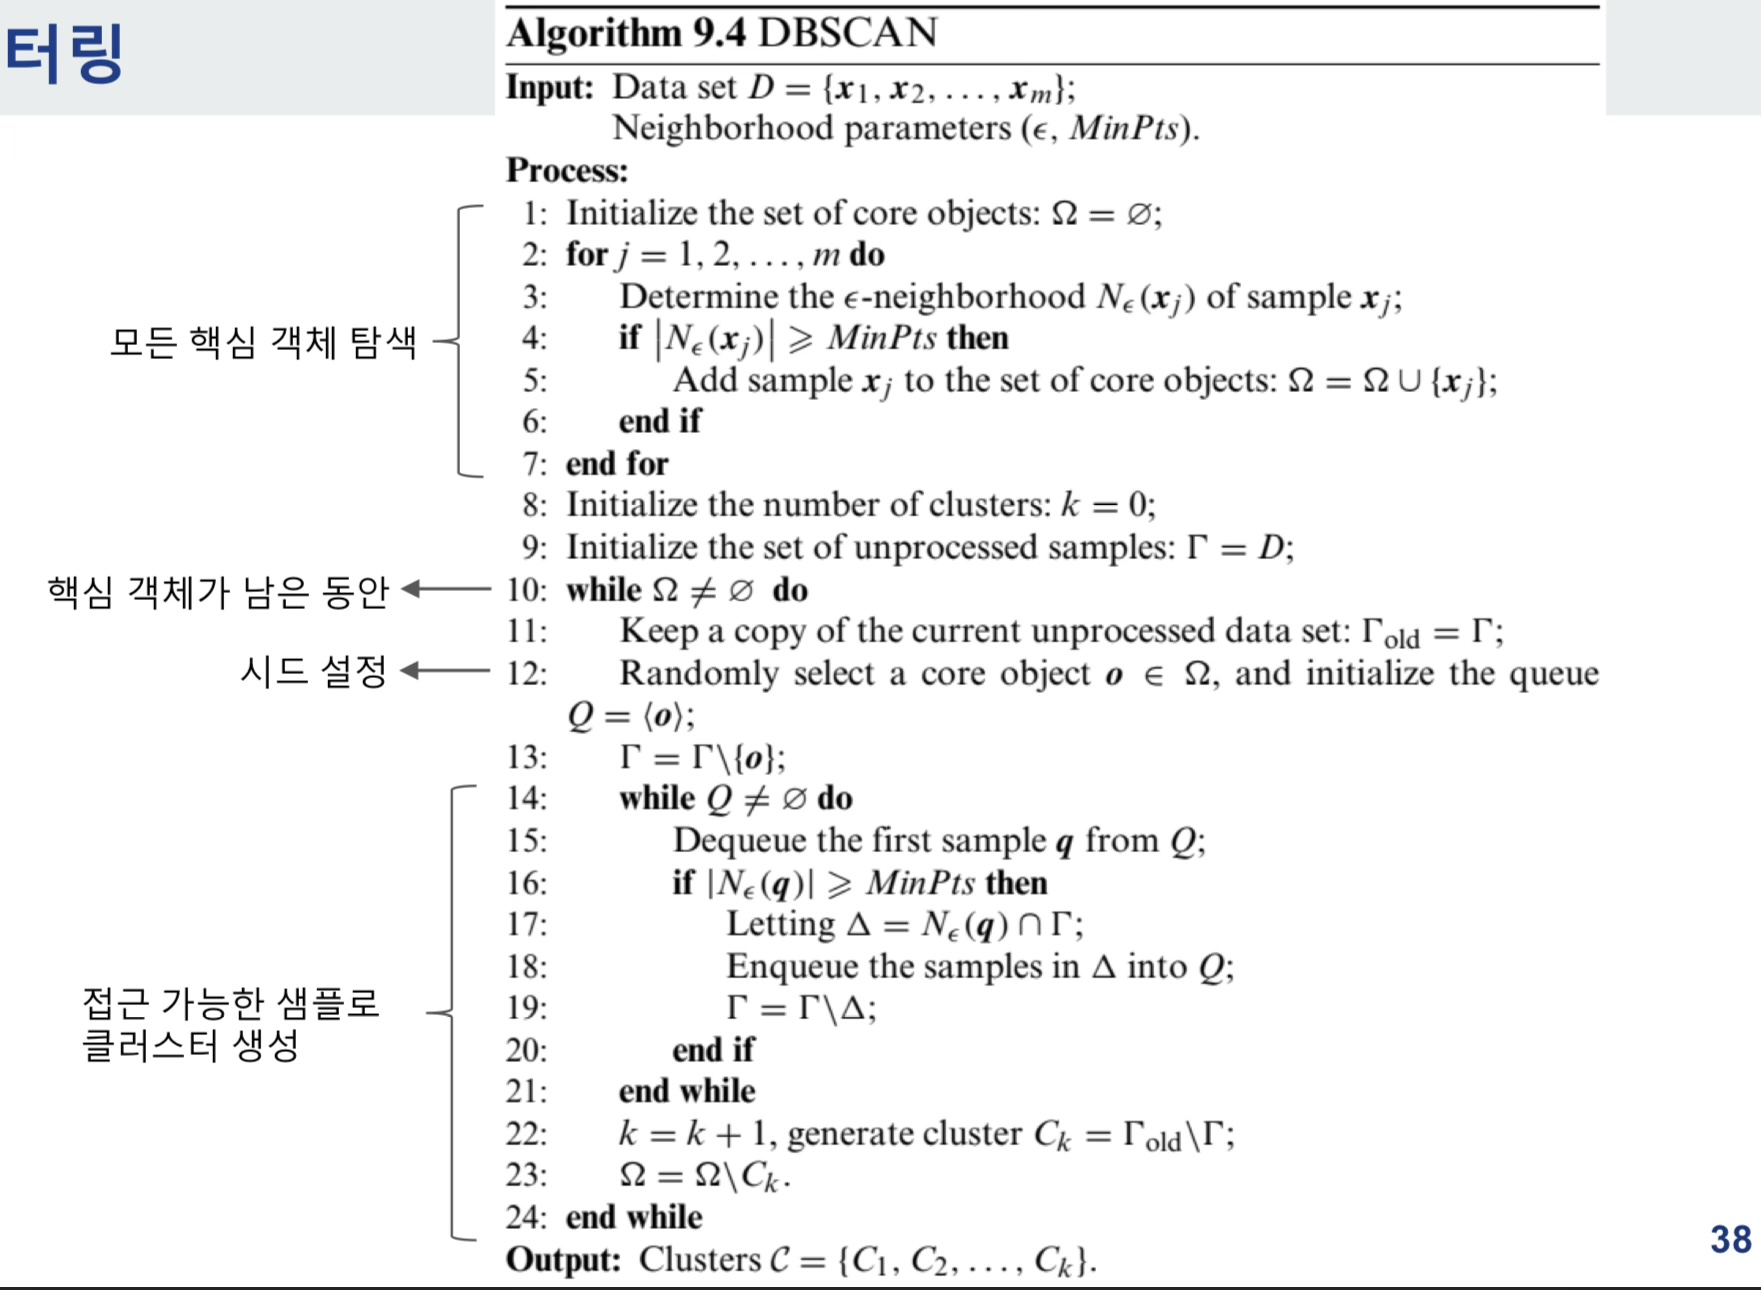

In [1]:
# DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from collections import deque
plt.rc('font', family='NanumBarunGothic')



In [125]:
#sample data

data = np.array([[0.697, 0.460, 1],
    [0.774, 0.376, 1],
    [0.634, 0.264, 1],
    [0.608, 0.318, 1],
    [0.556, 0.215, 1],
    [0.403, 0.237, 1],
    [0.481, 0.149, 1],
    [0.437, 0.211, 1],
    [0.666, 0.091, 0],
    [0.243, 0.267, 0],
    [0.245, 0.057, 0],
    [0.343, 0.099, 0],
    [0.639, 0.161, 0],
    [0.657, 0.198, 0],
    [0.360, 0.370, 0],
    [0.593, 0.042, 0],
    [0.719, 0.103, 0],
    [0.359, 0.188, 0],
    [0.339, 0.241, 0],
    [0.282, 0.257, 0],
    [0.748, 0.232, 0],
    [0.714, 0.346, 1],
    [0.483, 0.312, 1],
    [0.478, 0.437, 1],
    [0.525, 0.369, 1],
    [0.751, 0.489, 1],
    [0.532, 0.472, 1],
    [0.473, 0.376, 1],
    [0.725, 0.445, 1],
    [0.446, 0.459, 1]])
df = pd.DataFrame(data,columns = ["밀도","당도","label"])

df

,밀도,당도,label
0,0.697,0.460,1.0
1,0.774,0.376,1.0
2,0.634,0.264,1.0
3,0.608,0.318,1.0
4,0.556,0.215,1.0
5,0.403,0.237,1.0
6,0.481,0.149,1.0
7,0.437,0.211,1.0
8,0.666,0.091,0.0
9,0.243,0.267,0.0


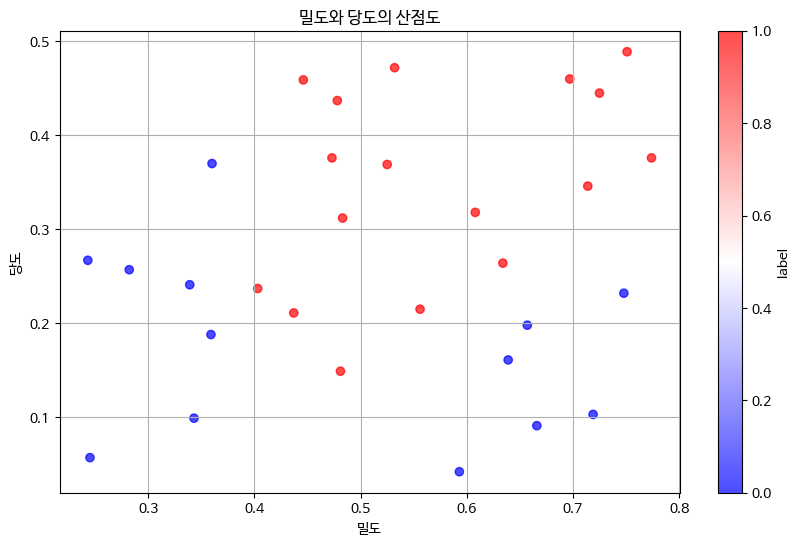

In [127]:
#그래프 그리기
plt.figure(figsize=(10, 6))
plt.scatter(df["밀도"], df["당도"], c=df["label"], cmap='bwr', alpha=0.7)
plt.colorbar(label='label')
plt.xlabel('밀도')
plt.ylabel('당도')
plt.title('밀도와 당도의 산점도')
plt.grid(True)
plt.show()

In [130]:
## sklearn으로 DBSCAN 한 결과
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.11, min_samples = 5)
df['cluster'] = dbscan.fit_predict(df[['밀도','당도']])

In [131]:
df

,밀도,당도,label,cluster
0,0.697,0.460,1.0,3
1,0.774,0.376,1.0,3
2,0.634,0.264,1.0,0
3,0.608,0.318,1.0,0
4,0.556,0.215,1.0,0
5,0.403,0.237,1.0,1
6,0.481,0.149,1.0,0
7,0.437,0.211,1.0,1
8,0.666,0.091,0.0,0
9,0.243,0.267,0.0,1


In [132]:
from scipy.spatial import ConvexHull

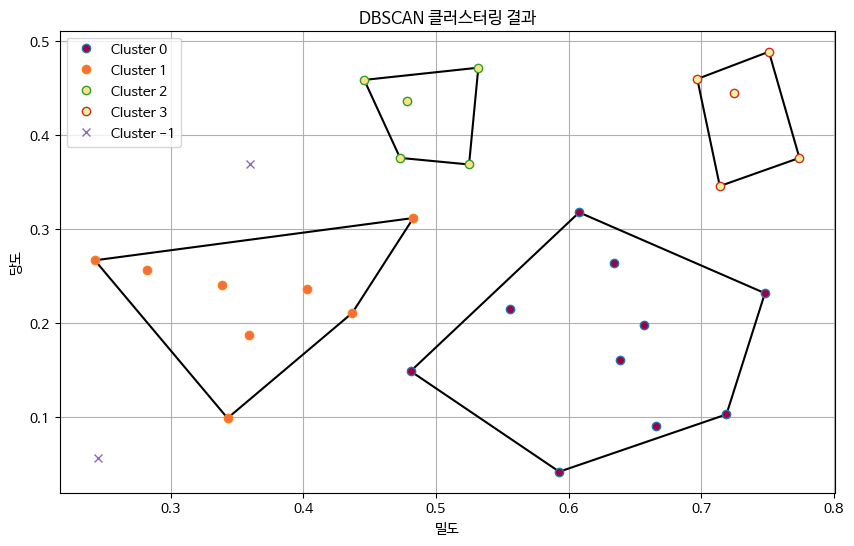

In [133]:
# 결과 시각화 및 클러스터 별 박스 그리기
plt.figure(figsize=(10, 6))
unique_labels = set(df['cluster'])

for label in unique_labels:
    if label == -1:
        # 노이즈 포인트
        color = 'k'
        marker = 'x'
    else:
        # 클러스터 포인트
        color = plt.cm.Spectral(label / len(unique_labels))
        marker = 'o'
        class_member_mask = (df['cluster'] == label)
        xy = df[class_member_mask][['밀도', '당도']].values
        if len(xy) >= 3:  # ConvexHull을 적용하기 위해 최소 3개의 포인트가 필요
            hull = ConvexHull(xy)
            for simplex in hull.simplices:
                plt.plot(xy[simplex, 0], xy[simplex, 1], 'k-')

    plt.plot(df[df['cluster'] == label]['밀도'], df[df['cluster'] == label]['당도'], marker, markerfacecolor=color, markersize=6, label=f'Cluster {label}')

plt.legend()
plt.title('DBSCAN 클러스터링 결과')
plt.xlabel('밀도')
plt.ylabel('당도')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


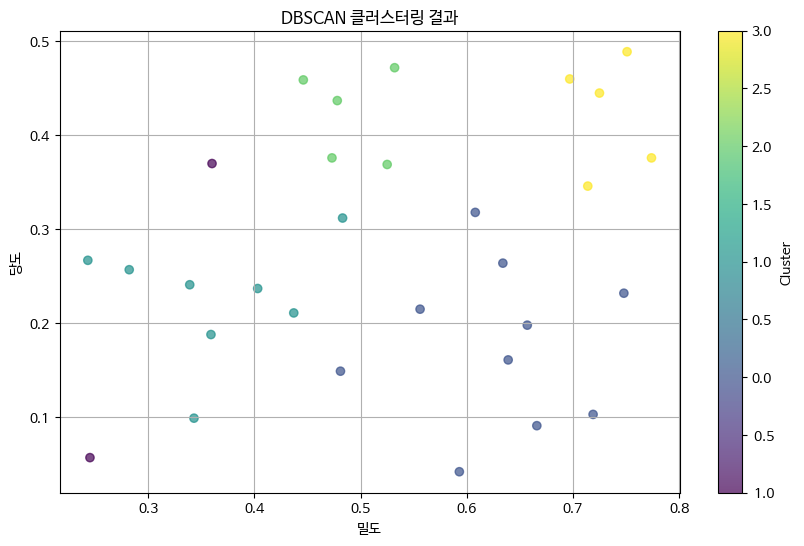

In [134]:
# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['밀도'], df['당도'], c=df['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('밀도')
plt.ylabel('당도')
plt.title('DBSCAN 클러스터링 결과')
plt.grid(True)
plt.show()

In [167]:
def euclidean_distance(x1, x2):
    #두 vector 사이 euclidean_distance 거리 계산
    distance = 0
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return math.sqrt(distance)

In [180]:
class DBSCAN_scratch:
    def __init__(self, eps, min_pts):
        self.eps = eps #eps 거리
        self.min_pts = min_pts # 최소 포인트

    def get_neighborhood(self, x): # 주변 eps 거리 보다 작은 sample들의 집합 만들기
        neighborhoods = [] #빈 neighborhoods 리스트를 생성
        for i, sample in enumerate(self.data):
            distance = euclidean_distance(self.data[x], sample) # 거리를 계산
            if distance < self.eps: #eps 보다 작으면
                neighborhoods.append(i) #neighborhood에 속함
        return np.array(neighborhoods) #neighborhood를 반환

    def fit(self, data):
        self.data = data.values # dataframe형태의 입력을 numpy.ndarray로 바꾸어
        self.labels = -1 * np.ones(len(data)) # label들을 -1로 초기화
        self.clusters = [] #clusters 초기화
        self.neighbors = {} #neighbors 초기화
        self.core_object = [] #핵심대상 초기화
        num_sample = np.shape(self.data)[0] #sample의 개수
        for i in range(num_sample):
            self.neighbors[i] = self.get_neighborhood(i) #neighrbood의를 정함
            if len(self.neighbors[i]) >= self.min_pts: #minpts보다 많으면 핵심 대상으로 지정하고 핵심대상 집합에 넣음
                self.core_object.append(i)

        unprocessed_sample = list(range(num_sample))  #처리되지 않은 샘플들
        unprocessed_core_object = set(self.core_object) #처리되지않은 핵심대상
        k = 0 #cluster 개수 0개 시작

        while len(unprocessed_core_object) > 0: #핵심 대상이 사라질때 까지 반복
            old_unprocessed_sample = unprocessed_sample.copy()
            one_core_object = random.sample(list(unprocessed_core_object), 1)[0] # 랜덤으로 시드 선택
            #print(one_core_object)
            queue = deque() #queue를 만들어 핵심 대상을 하나 넣음
            queue.append(one_core_object) #queue를 만들어 핵심 대상을 하나 넣음
            if one_core_object in unprocessed_sample: #해당 핵심 대상을 unprocessed_sample에서 제거
                unprocessed_sample.remove(one_core_object)

            while len(queue) > 0:#queue가 없어질때 까지 반복
                first_core_object = queue.popleft() #queue에서 왼쪽에 있는 샘플을 추출
                if len(self.neighbors[first_core_object]) >= self.min_pts: #해당 샘플의 neighbor가 min_pts개 보다 많으면
                    set_set = set(self.neighbors[first_core_object]) & set(unprocessed_sample) #neighbor과 unprocessed_sample 사이의 교집합을 구하고
                    for item in set_set: # 교집합을 queue에 다시 넣고 해당 교집합을 unprocessed_sample에서 제거
                        if item in unprocessed_sample:
                            queue.append(item)
                            unprocessed_sample.remove(item)

            k += 1
            cluster_indices = set(old_unprocessed_sample) - set(unprocessed_sample) #이전 old_unprocessed_sp에서 unprocessed_sp을 제거
            cluster = self.data[list(cluster_indices)]
            self.clusters.append(cluster)
            for index in cluster_indices:
                self.labels[index] = k


            if one_core_object in unprocessed_core_object:
                unprocessed_core_object.remove(one_core_object)

            self.df = pd.DataFrame(data)
            self.df['Cluster_result'] = self.labels


        return self.df

In [181]:
clf = DBSCAN_scratch(0.11,5)

In [182]:
data_f = clf.fit(df[['밀도','당도']])

In [183]:
df['cluster_result'] = data_f['Cluster_result']

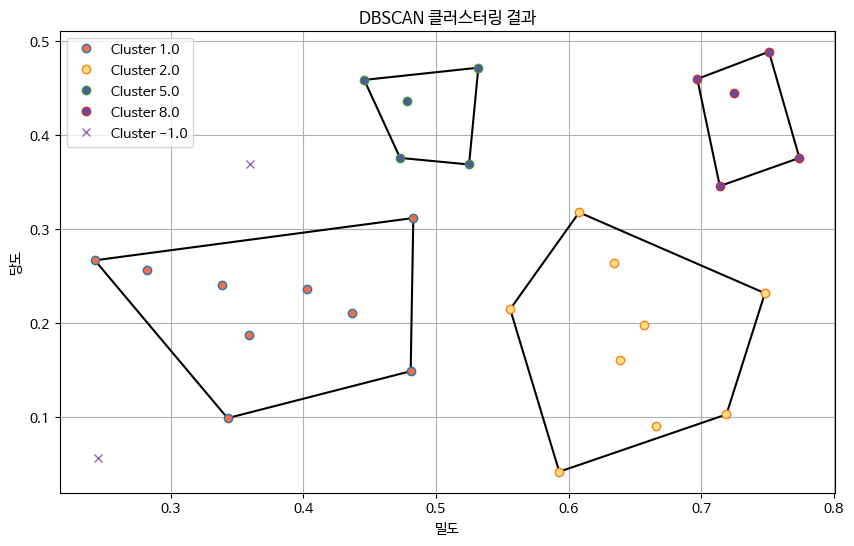

In [184]:
# 결과 시각화 및 클러스터 별 박스 그리기
plt.figure(figsize=(10, 6))
unique_labels = set(df['cluster_result'])

for label in unique_labels:
    if label == -1:
        # 노이즈 포인트
        color = 'k'
        marker = 'x'
    else:
        # 클러스터 포인트
        color = plt.cm.Spectral(label / len(unique_labels))
        marker = 'o'
        class_member_mask = (df['cluster_result'] == label)
        xy = df[class_member_mask][['밀도', '당도']].values
        if len(xy) >= 3:  # ConvexHull을 적용하기 위해 최소 3개의 포인트가 필요
            hull = ConvexHull(xy)
            for simplex in hull.simplices:
                plt.plot(xy[simplex, 0], xy[simplex, 1], 'k-')

    plt.plot(df[df['cluster_result'] == label]['밀도'], df[df['cluster_result'] == label]['당도'], marker, markerfacecolor=color, markersize=6, label=f'Cluster {label}')

plt.legend()
plt.title('DBSCAN 클러스터링 결과')
plt.xlabel('밀도')
plt.ylabel('당도')
plt.grid(True)
plt.show()